<a href="https://colab.research.google.com/github/ssyyjj1012/data-analysis/blob/main/Final_Project_%EC%9E%90%EC%A0%84%EA%B1%B0_%EB%8C%80%EC%97%AC%EB%9F%89_%EC%98%88%EC%B8%A1(%EC%8B%A4%EC%8A%B5)_%ED%95%9C%EB%A6%BC%EB%8C%80%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 데이터분석과 시각화, 머신러닝 알고리즘으로 시간 당 자전거 대여량 예측

자전거 대여 스타트업의 데이터를 활용하여, 특정 시간대에 얼마나 많은 사람들이 자전거를 대여하는지 예측하는 것이 목표입니다.

사람들이 자전거를 대여하는데는 많은 요소가 관여되어 있을 겁니다. 

가령 시간(새벽보다 낮에 많이 빌리겠죠), 날씨(비가 오면 자전거를 대여하지 않을 겁니다), 근무일(근무 시간에는 자전거를 대여하지 않겠죠) 등. 이런 모든 요소를 조합하여 자전거 교통량을 예측해주세요. 

이번 경진대회에서는 기존까지 배웠던 프로그래밍 언어와 인공지능&머신러닝 능력 외에도, 자전거 렌탈 시장에 대한 약간의 전문지식, 그리고 일반인의 기초 상식을 총동원 할 수 있습니다.

## 데이터 설명

  * **datetime** - 시간. 연-월-일 시:분:초 로 표현합니다. (가령 2011-01-01 00:00:00은 2011년 1월 1일 0시 0분 0초)
  * **season** - 계절. 봄(1), 여름(2), 가을(3), 겨울(4) 순으로 표현합니다.
  * **holiday** - 공휴일. 1이면 공휴일이며, 0이면 공휴일이 아닙니다.
  * **workingday** - 근무일. 1이면 근무일이며, 0이면 근무일이 아닙니다.
  * **weather** - 날씨. 1 ~ 4 사이의 값을 가지며, 구체적으로는 다음과 같습니다.
    * 1: 아주 깨끗한 날씨입니다. 또는 아주 약간의 구름이 끼어있습니다.
    * 2: 약간의 안개와 구름이 끼어있는 날씨입니다.
    * 3: 약간의 눈, 비가 오거나 천둥이 칩니다.
    * 4: 아주 많은 비가 오거나 우박이 내립니다.
  * **temp** - 온도. 섭씨(Celsius)로 적혀있습니다.
  * **atemp** - 체감 온도. 마찬가지로 섭씨(Celsius)로 적혀있습니다.
  * **humidity** - 습도.
  * **windspeed** - 풍속.
  * **casual** - 비회원(non-registered)의 자전거 대여량.
  * **registered** - 회원(registered)의 자전거 대여량.
  * **count** - 총 자전거 대여랑. 비회원(casual) + 회원(registered)과 동일합니다.
  
## 프로젝트 구성
* 데이터 로드 (load data)
* 데이터 개요
* 데이터 전처리 (pre-processing)
* 모델 생성
* 검증
* 예측
* 제출 및 점수확인

## 환경설정

In [32]:
project_name = "자전거 대여량 예측" # 프로젝트 이름
class_info = "1차수 A반" # 차수 정보
email = "ssyyjj1012@naver.com" # 본인 이메일 입력

## 모듈 설치 및 데이터 다운로드

In [33]:
!pip install --upgrade mySUNI -q
import mySUNI
from mySUNI import cds, utils
print(f'패키지 버전: {mySUNI.__version__}')

myPro = cds.Project(project_name, class_info, email)
myPro.edu_name = '한림대-데이터분석과정_비전공자'

패키지 버전: 1.2.7


In [34]:
cds.download_project(project_name, class_info, email)


프로젝트: 자전거 대여량 예측
파일 목록

train.csv
- data/자전거 대여량 예측/train.csv

test.csv
- data/자전거 대여량 예측/test.csv

submission.csv
- data/자전거 대여량 예측/submission.csv



## 모듈 import 

필요한 모듈을 import 합니다. 필요에 따라 추가 패키지를 load 할 수 있습니다.

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import os
import warnings

warnings.filterwarnings('ignore')
utils.set_plot_error('rmsle')

%matplotlib inline

# Data 경로 설정
DATA_DIR = 'data'

# train 데이터셋 로드 (train.csv)
train = pd.read_csv(os.path.join(DATA_DIR, project_name, 'train.csv'))
                                 
# test 데이터셋 로드 (test.csv)
test = pd.read_csv(os.path.join(DATA_DIR, project_name, 'test.csv'))

# 이메일 설정 확인
print('==='*15)
print(f'\n본인 이메일 확인: {myPro.email}\n')
print('==='*15)

if not myPro.email:
    raise print("환경설정에서 이메일을 설정해 주세요↑↑↑")


본인 이메일 확인: ssyyjj1012@naver.com



2개의 데이터 셋트를 나누어 제공합니다.

1. train: 학습용 데이터 세트. 정답 값이라고 할 수 있는 `label` 값이 같이 제공됩니다.
2. test: 예측용 데이터 세트. 정답 값이 빠진 `feature` 들만 제공됩니다. 우리는 이 `feature`를 활용하여 예측을 진행합니다.

In [36]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [37]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


## 데이터 설명

  * **datetime** - 시간. 연-월-일 시:분:초 로 표현합니다. (가령 2011-01-01 00:00:00은 2011년 1월 1일 0시 0분 0초)
  * **season** - 계절. 봄(1), 여름(2), 가을(3), 겨울(4) 순으로 표현합니다.
  * **holiday** - 공휴일. 1이면 공휴일이며, 0이면 공휴일이 아닙니다.
  * **workingday** - 근무일. 1이면 근무일이며, 0이면 근무일이 아닙니다.
  * **weather** - 날씨. 1 ~ 4 사이의 값을 가지며, 구체적으로는 다음과 같습니다.
    * 1: 아주 깨끗한 날씨입니다. 또는 아주 약간의 구름이 끼어있습니다.
    * 2: 약간의 안개와 구름이 끼어있는 날씨입니다.
    * 3: 약간의 눈, 비가 오거나 천둥이 칩니다.
    * 4: 아주 많은 비가 오거나 우박이 내립니다.
  * **temp** - 온도. 섭씨(Celsius)로 적혀있습니다.
  * **atemp** - 체감 온도. 마찬가지로 섭씨(Celsius)로 적혀있습니다.
  * **humidity** - 습도.
  * **windspeed** - 풍속.
  * **casual** - 비회원(non-registered)의 자전거 대여량.
  * **registered** - 회원(registered)의 자전거 대여량.
  * **count** - 총 자전거 대여랑. 비회원(casual) + 회원(registered)과 동일합니다.

In [38]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [39]:
train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [40]:
features =['datetime', 
           'season', 
           'holiday', 
           'workingday', 
           'weather', 
           'temp',
           'atemp', 
           'humidity',
          'windspeed']

In [41]:
train['datetime'] = pd.to_datetime(train['datetime'])
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
# train['day'] = train['datetime'].dt.day
# train['hour'] = train['datetime'].dt.hour
# train['minute'] = train['datetime'].dt.minute
# train['second'] = train['datetime'].dt.second

In [42]:
test['datetime'] = pd.to_datetime(test['datetime'])
test['year'] = test['datetime'].dt.year
test['month'] = test['datetime'].dt.month
# test['day'] = test['datetime'].dt.day
# test['hour'] = test['datetime'].dt.hour
# test['minute'] = test['datetime'].dt.minute
# test['second'] = test['datetime'].dt.second

In [43]:
train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'year', 'month'],
      dtype='object')

In [44]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    6493 non-null   datetime64[ns]
 1   season      6493 non-null   int64         
 2   holiday     6493 non-null   int64         
 3   workingday  6493 non-null   int64         
 4   weather     6493 non-null   int64         
 5   temp        6493 non-null   float64       
 6   atemp       6493 non-null   float64       
 7   humidity    6493 non-null   int64         
 8   windspeed   6493 non-null   float64       
 9   year        6493 non-null   int64         
 10  month       6493 non-null   int64         
dtypes: datetime64[ns](1), float64(3), int64(7)
memory usage: 558.1 KB


In [45]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  year        10886 non-null  int64         
 13  month       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(10)
memory usage: 1.2 MB


In [46]:
def datetime_integer(x):
  return 10000 * x.year + 100 * x.month + x.day
  
train_datetime_int = train['datetime'].apply(lambda x: datetime_integer(x))
train['datetime'] = pd.Series(train_datetime_int)

test_datetime_int = test['datetime'].apply(lambda x: datetime_integer(x))
test['datetime'] = pd.Series(test_datetime_int)

In [47]:
label = 'count'

## 데이터셋 분할

In [48]:
from sklearn.model_selection import train_test_split

SEED = 123

x_train, x_test, y_train, y_test = train_test_split(train[features], train[label], 
                                                    random_state=SEED)

In [49]:
x_train.shape,x_test.shape

((8164, 9), (2722, 9))

## 모델

In [50]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=SEED)
model.fit(x_train, y_train)
pred = model.predict(x_test)

In [51]:
# 참고 코드
from sklearn.metrics import mean_squared_log_error

RMSLE = lambda y_true, y_pred: np.sqrt(mean_squared_log_error(y_true, y_pred))

RMSLE(y_test, pred)

1.1632823048329022

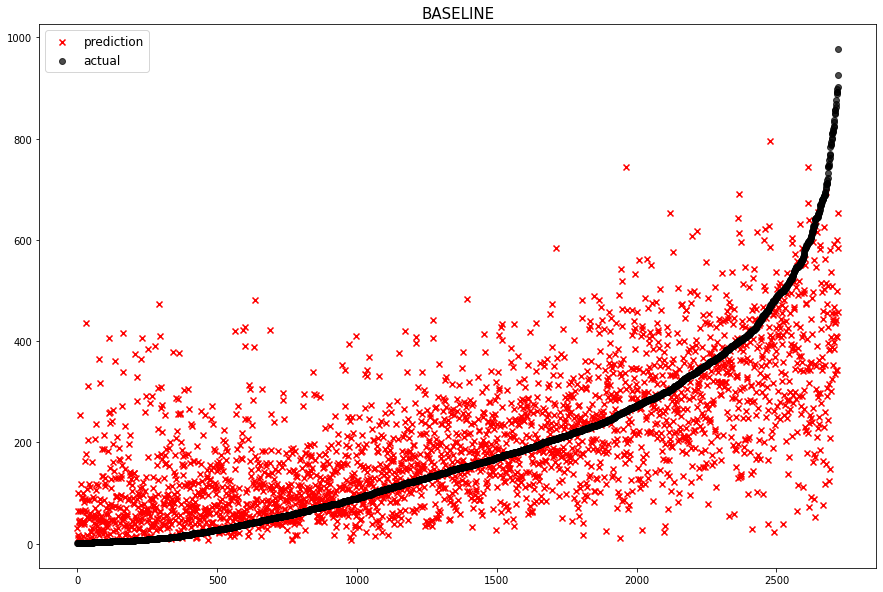

      model     error
0  BASELINE  1.163282


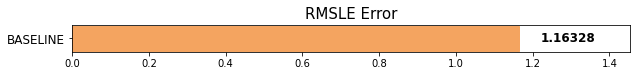

In [52]:
# 시각화 샘플 코드
utils.plot_error('BASELINE', y_test, pred)

## 최종 예측 (test)

In [53]:
final_pred = model.predict(test[features])
final_pred[:10]

array([93.75      , 83.53      , 83.53      , 81.30333333, 81.30333333,
       78.24666667, 80.86      , 74.585     , 74.94      , 84.03333333])

In [54]:
# test.csv를 예측한 결과 대입
prediction = final_pred

In [55]:
# 값에 오류가 없는지 확인
utils.check_error(prediction)

[통과] 문제가 발견되지 않았습니다.


## 평가지표 (RMSLE)

In [56]:
# 참고 코드
from sklearn.metrics import mean_squared_log_error

RMSLE = lambda y_true, y_pred: np.sqrt(mean_squared_log_error(y_true, y_pred))

# RMSLE(y_test, pred)

## 시각화 샘플 코드

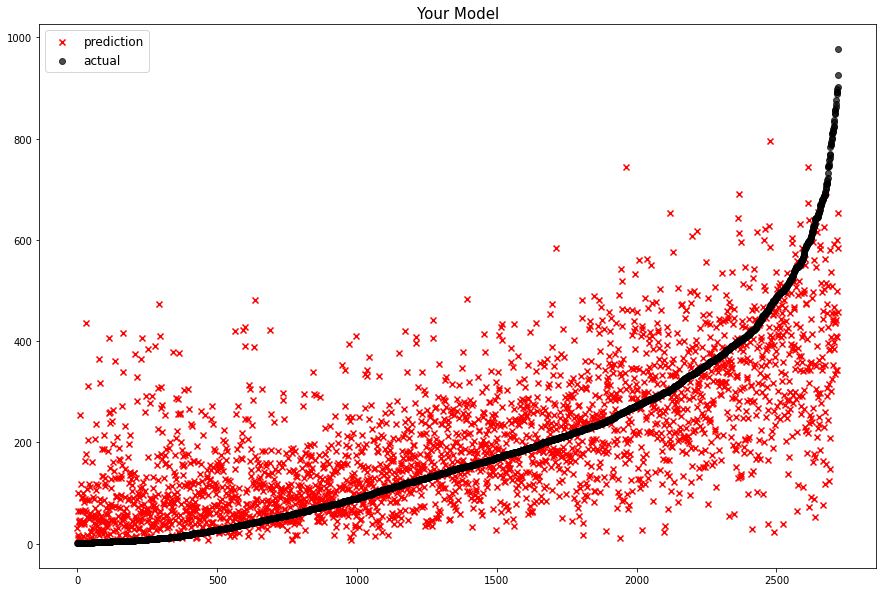

        model     error
0    BASELINE  1.163282
1  Your Model  1.163282


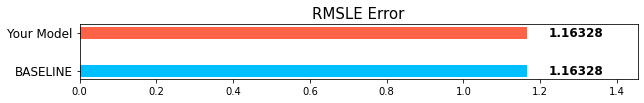

In [57]:
# 시각화 샘플 코드
utils.plot_error('Your Model', y_test, pred)

In [58]:
# 시각화 차트 초기화
utils.clear_error()

# 순서대로 평가가 진행됩니다. 실행은 1회만 해주세요.

- 느리다고 중지 후 다시 평가 코드를 실행하는 경우 제출 과정에서 패널티가 발생할 수 있습니다. (제출 횟수 이슈 발생 가능)

In [59]:
# 값에 오류가 없는지 확인
utils.check_error(prediction)

# 제출 파일 생성 및 결과 제출
submission = pd.read_csv(os.path.join(DATA_DIR, project_name, 'submission.csv'))
submission['count'] = prediction
display(submission)
myPro.email = email
print(f'제출자: {email}')
myPro.submit(submission)

[통과] 문제가 발견되지 않았습니다.


,datetime,count
0,2011-01-20 00:00:00,93.750000
1,2011-01-20 01:00:00,83.530000
2,2011-01-20 02:00:00,83.530000
3,2011-01-20 03:00:00,81.303333
4,2011-01-20 04:00:00,81.303333
...,...,...
6488,2012-12-31 19:00:00,283.170000
6489,2012-12-31 20:00:00,283.170000
6490,2012-12-31 21:00:00,167.760000
6491,2012-12-31 22:00:00,110.360000


제출자: ssyyjj1012@naver.com
파일을 저장하였습니다. 파일명: submission-03-51-56.csv
제출 여부 :success
오늘 제출 횟수 : 3
제출 결과:1.37096


# 순서대로 평가가 진행됩니다. 실행은 1회만 해주세요.

- 느리다고 중지 후 다시 평가 코드를 실행하는 경우 제출 과정에서 패널티가 발생할 수 있습니다. (제출 횟수 이슈 발생 가능)

- 전체 점수는 [평가시스템](http://manage.jaen.kr)에서 확인할 수 있습니다.
    - 프로젝트 > 자전거 대여량 예측 > 리더보드 > 같은 반 리더보드
    - 아이디: `본인이메일`
    - 비번: `hl1234`